         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


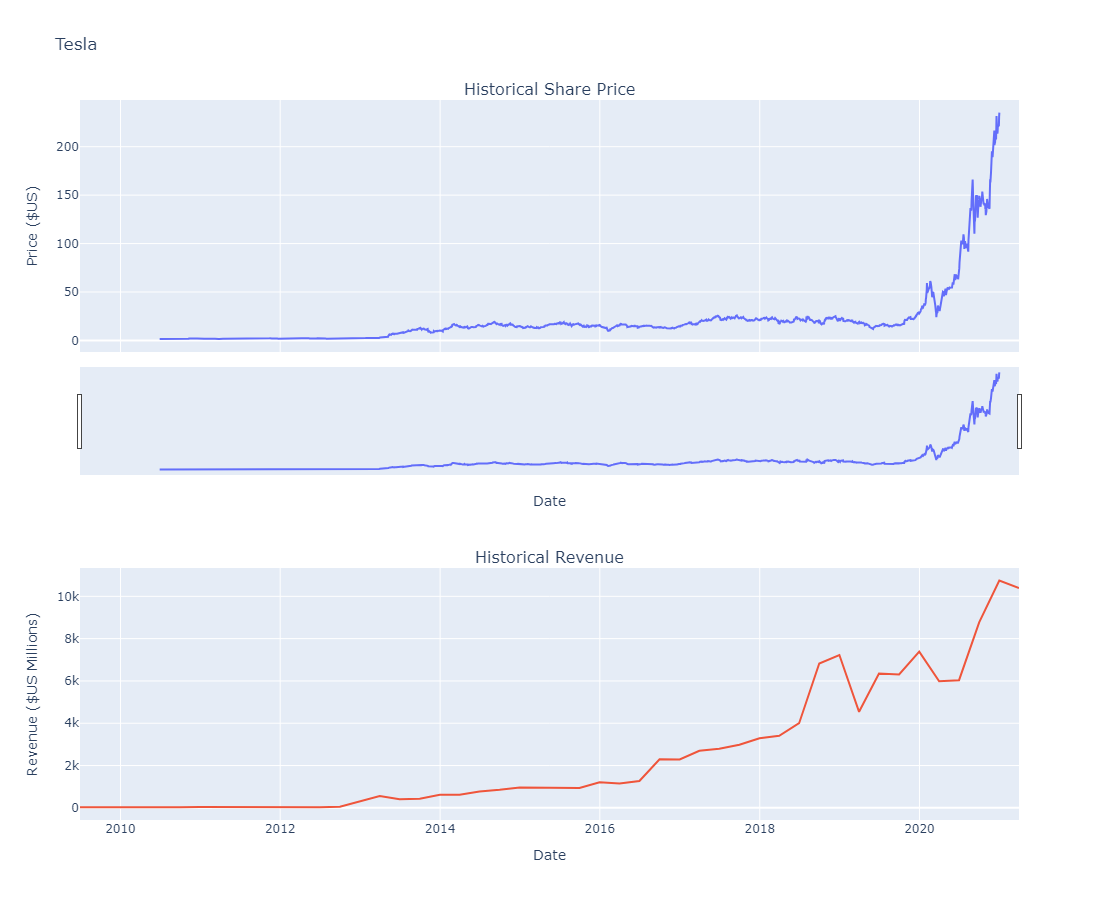

In [2]:
## Question 5: Plot Tesla Stock Graph
# Assuming make_graph is a predefined function and tesla_data, tesla_revenue are your DataFrame
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extract Tesla Revenue Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with Tesla revenue data (second table in the page)
table = soup.find_all("tbody")[1]

# Create an empty DataFrame for Tesla revenue data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

#Iterate through each row in table
for row in table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
    tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)


# Clean the 'Revenue' column by removing commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Print the first few rows of the Tesla revenue data to verify
print(tesla_revenue.head())

# Step 2: Download Tesla Stock Data
# Creating an object using the Ticker module with the ticker symbol 'TSLA' for Tesla.
Tesla = yf.Ticker("TSLA")

# Fetching the historical market data for Tesla
tesla_data = Tesla.history(period="max")  # Fetches the historical data for Tesla

# Reset the index
tesla_data.reset_index(inplace=True)

# Ensure the 'Date' column is in string format to match the revenue data format
tesla_data['Date'] = tesla_data['Date'].astype(str)

# Display the first five rows
# print(tesla_data.head())


# Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, utc=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, utc=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')
